In [575]:
#Add Matplotlib inline magic command
%matplotlib inline

In [576]:
#Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter, MonthLocator

In [577]:
#Load csv file
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [578]:
#Read the city data file and store it in a pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [579]:
#Merge City and Ride data file.
pyber_data_df=pd.merge(ride_data_df, city_data_df, how = "left", on =["city", "city"])

In [580]:
#Get rides count by city type
rides_count = pyber_data_df.groupby(["type"]).count()["ride_id"]

In [581]:
#Get drivers count by city type
drivers_count = city_data_df.groupby(["type"]).sum()["driver_count"]

In [582]:
#Get total fares by city type
total_fare = pyber_data_df.groupby(["type"]).sum()["fare"]

In [583]:
#Get average fare per ride by city type
fare_per_ride = total_fare/rides_count

In [584]:
#Get average fare per driver by city type
fare_per_driver = total_fare/drivers_count

In [585]:
#Build the Summary DataFrame
summary_df = pd.DataFrame({"Total Rides":rides_count, 
                           "Total Drivers":drivers_count, 
                           "Total Fares":total_fare, 
                           "Average Fare per Ride":fare_per_ride, 
                           "Average Fare per Driver":fare_per_driver})

In [586]:
# Format each column of the Summary DataFrame
summary_df["Total Rides"] = summary_df["Total Rides"].map("{:,.0f}".format)
summary_df["Total Drivers"] = summary_df["Total Drivers"].map("{:,.0f}".format)
summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)
summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:,.2f}".format)
summary_df["Average Fare per Driver"] =summary_df["Average Fare per Driver"].map("${:,.2f}".format)

In [587]:
#Print the Summary datafrome
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [588]:
#Rename column headers on pyber_data_df dataframe
pyber_data_df = pyber_data_df.rename(columns=
                              {"city": "City", 
                               "date":"Date",
                               "fare":"Fare", 
                               "ride_id": "Ride Id",
                               "driver_count": "No. Drivers", 
                               "type":"City Type"})

In [589]:
#Reset pyber_data_df index to Date column
pyber_data_df.set_index(pyber_data_df["Date"])

,City,Date,Fare,Ride Id,No. Drivers,City Type
Date,,,,,,
1/14/2019 10:14,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873,5,Urban
3/4/2019 18:24,South Michelleport,3/4/2019 18:24,30.24,2343912425577,72,Urban
2/24/2019 4:29,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003,57,Urban
2/10/2019 23:22,Rodneyfort,2/10/2019 23:22,23.44,5149245426178,34,Urban
3/6/2019 4:28,South Jack,3/6/2019 4:28,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
4/29/2019 17:04,Michaelberg,4/29/2019 17:04,13.38,8550365057598,6,Rural
1/30/2019 0:05,Lake Latoyabury,1/30/2019 0:05,20.76,9018727594352,2,Rural
2/10/2019 21:03,North Jaime,2/10/2019 21:03,11.11,2781339863778,1,Rural


In [590]:
#Create new DataFrame for "Date", "City Type" and "Fare"
fare_df = pyber_data_df[["Date", "City Type", "Fare"]].copy()

In [591]:
# Convert Date column to DatetimeIndex and drop extra Date column
fare_df = fare_df.set_index(pd.DatetimeIndex(fare_df["Date"]))
fare_df = fare_df.drop("Date", 1)

In [592]:
#Verify that Date is in datetime format
fare_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:00 to 2019-04-25 10:20:00
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [593]:
#Create dataframes with grouping for fares by type and date
fare_per_type_df = pyber_data_df.groupby(["City Type","Date"]).sum()["Fare"]

In [594]:
#Reset the index
fare_per_type_df.reset_index()

,City Type,Date,Fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26
...,...,...,...
2359,Urban,5/8/2019 1:54,32.69
2360,Urban,5/8/2019 2:31,41.33
2361,Urban,5/8/2019 4:20,21.99
2362,Urban,5/8/2019 4:39,18.45


In [595]:
#Create pivot table for fare
fare_pvt = pd.pivot_table(fare_df,
                          index="Date", 
                          columns="City Type", 
                          values ="Fare",                              
                          aggfunc=np.sum)

In [596]:
#Create dataframe from pivot_table and only populate data with date "2019-01-01" and "2019-04-28"
fare_plot_df=fare_pvt.resample("W").sum()
fare_plot_df = fare_plot_df.loc["2019-01-01":"2019-04-28"]

In [597]:
fare_plot_df.reset_index()
# Get the weekly total fare for Urban cities.
wkly_urban_fare = fare_plot_df["Urban"]

# Get the weekly total fare for Suburban cities.
wkly_suburban_fare = fare_plot_df["Suburban"] 

# Get the weekly total fare for Rural cities.
wkly_rural_fare = fare_plot_df["Rural"]

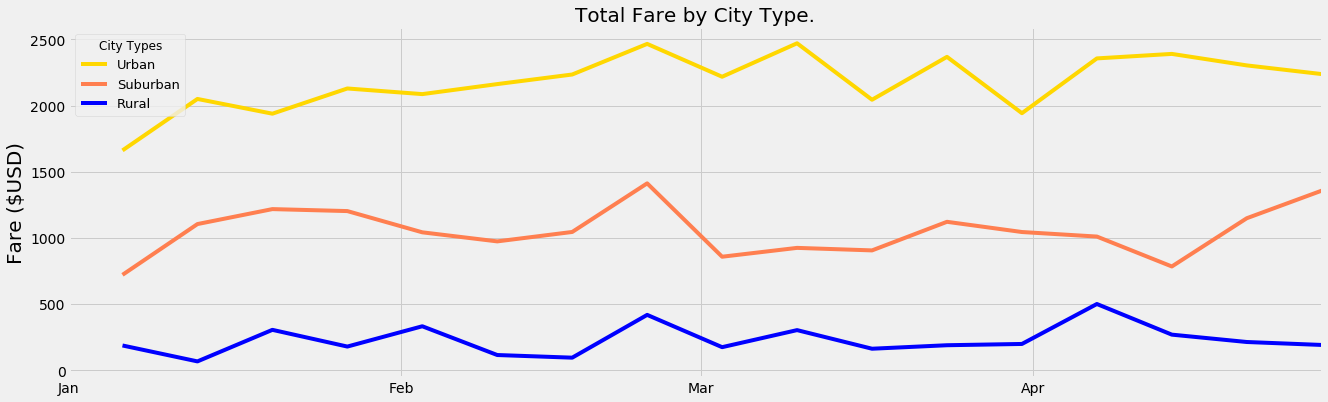

In [598]:
#Use graph style fivethirtyeight
plt.style.use('fivethirtyeight')

# Build the line charts for each city type using object-oriented interface method
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot()

ax.plot(wkly_urban_fare, 
       c="gold", 
      label="Urban")

ax.plot(wkly_suburban_fare, 
       c="coral", 
      label="Suburban")

ax.plot(wkly_rural_fare, 
       c="blue", 
      label="Rural")

# Incorporate the other graph properties
ax.set_title("Total Fare by City Type.", fontsize=20)
ax.set_ylabel("Fare ($USD)", fontsize=20)
ax.set_xlim(pd.Timestamp("2019-01-1"), pd.Timestamp("2019-04-28"))
ax.set_yticks(np.arange(0, 2600, step=500))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
ax.xaxis.set_major_locator(MonthLocator())

        
# Create a legend
lgnd = plt.legend(fontsize="13", mode="Expanded", loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [80]
lgnd.legendHandles[1]._sizes = [80]
lgnd.legendHandles[2]._sizes = [80]
lgnd.get_title().set_fontsize(12)
lgnd.get_title().set_fontsize(12)

#Save figure
plt.savefig("Resources/module5_graph.png")

# Show the plot
plt.show()